#Heart Attack Predictor

###Importing necesarry Libraries

In [88]:
import warnings
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [89]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Loading the Dataset

In [90]:
file_path = '/content/drive/MyDrive/heart_attack_prediction_dataset.csv'
df = pd.read_csv(file_path)
start_time = time.time()

In [91]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [92]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

###Data Preprocessing

In [93]:
#check for missing values
print("Percentage of missing values:")
print(((df.isna().sum())/df.shape[0])*100)

Percentage of missing values:
Patient ID                         0.0
Age                                0.0
Sex                                0.0
Cholesterol                        0.0
Blood Pressure                     0.0
Heart Rate                         0.0
Diabetes                           0.0
Family History                     0.0
Smoking                            0.0
Obesity                            0.0
Alcohol Consumption                0.0
Exercise Hours Per Week            0.0
Diet                               0.0
Previous Heart Problems            0.0
Medication Use                     0.0
Stress Level                       0.0
Sedentary Hours Per Day            0.0
Income                             0.0
BMI                                0.0
Triglycerides                      0.0
Physical Activity Days Per Week    0.0
Sleep Hours Per Day                0.0
Country                            0.0
Continent                          0.0
Hemisphere                        

No missing values in Dataset

In [94]:
#age
print(round(df.groupby(['Sex', 'Heart Attack Risk'])['Age'].agg(['mean']), 0))

                          mean
Sex    Heart Attack Risk      
Female 0                  53.0
       1                  53.0
Male   0                  54.0
       1                  54.0


In [95]:
df.drop(columns = ["Patient ID", "Continent", "Hemisphere"], inplace = True)

In [96]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Heart Attack Risk'],
      dtype='object')

In [97]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0


####Splitting the BP into Systole and Diastole BP

In [98]:
df[['High_BP', 'Low_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Converting the new columns to numeric type
df['High_BP'] = pd.to_numeric(df['High_BP'])
df['Low_BP'] = pd.to_numeric(df['Low_BP'])

# Dropping the original "Blood Pressure" column
df.drop(columns=['Blood Pressure'], inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [100]:
numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# Normalize only numeric columns to a range of 0 to 1
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())


###Data Plots

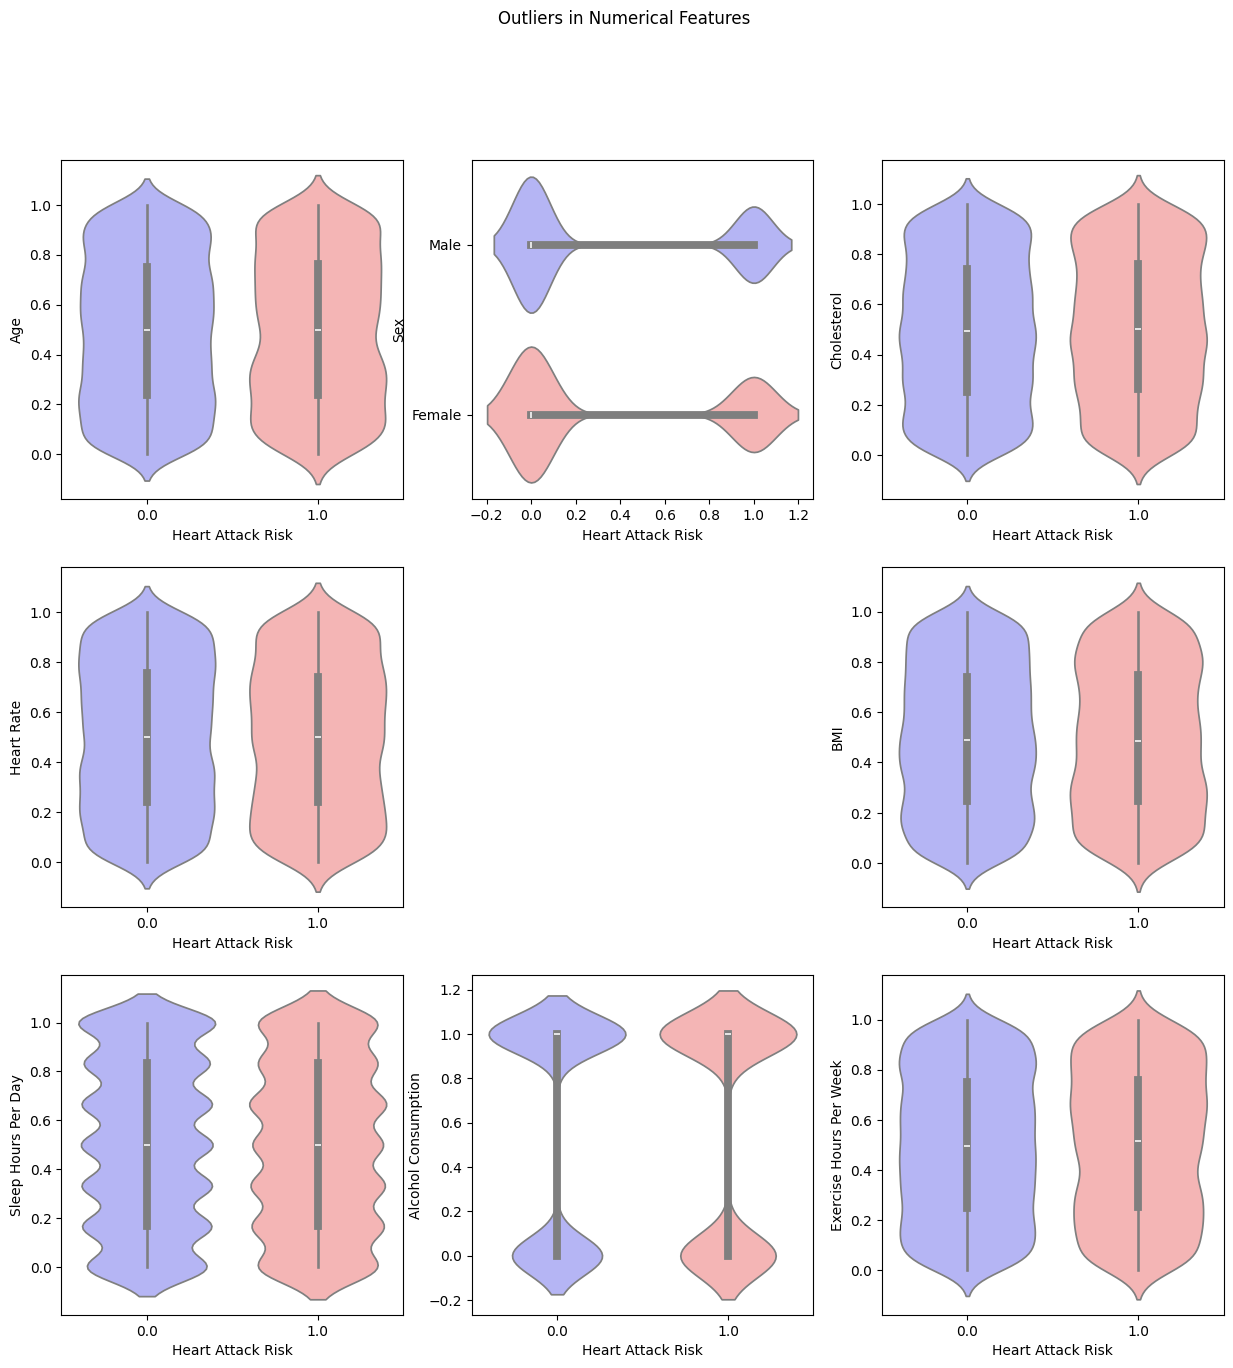

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, axes = plt.subplots(3, 3, figsize=(15, 15))
figure.suptitle("Outliers in Numerical Features")

# Remove the subplot at index (1, 1)
figure.delaxes(axes[1][1])

# Plot violin plots for each numerical feature against "Heart Attack Risk"
sns.violinplot(ax=axes[0, 0], data=df, x="Heart Attack Risk", y="Age", palette="bwr")
sns.violinplot(ax=axes[0, 1], data=df, x="Heart Attack Risk", y="Sex", palette="bwr")
sns.violinplot(ax=axes[0, 2], data=df, x="Heart Attack Risk", y="Cholesterol", palette="bwr")
sns.violinplot(ax=axes[1, 0], data=df, x="Heart Attack Risk", y="Heart Rate", palette="bwr")
# sns.boxplot(ax=axes[1, 1], data=df, x="Heart Attack Risk", y="Blood Pressure", palette="bwr")
sns.violinplot(ax=axes[1, 2], data=df, x="Heart Attack Risk", y="BMI", palette="bwr")
sns.violinplot(ax=axes[2, 0], data=df, x="Heart Attack Risk", y="Sleep Hours Per Day", palette="bwr")
sns.violinplot(ax=axes[2, 1], data=df, x="Heart Attack Risk", y="Alcohol Consumption", palette="bwr")
sns.violinplot(ax=axes[2, 2], data=df, x="Heart Attack Risk", y="Exercise Hours Per Week", palette="bwr")

# Display the plot
plt.show()


In [102]:
df.drop(columns = ["Diet", "Stress Level", "Triglycerides", "Physical Activity Days Per Week", "Sleep Hours Per Day", "Sedentary Hours Per Day", "Family History", "Physical Activity Days Per Week", "Income", "Medication Use"], inplace = True)

####Web Scraping to find the average yearly temperature of each Country

In [103]:
from bs4 import BeautifulSoup
import requests

# URL of the Wikipedia page containing the table
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature'

# Fetch the HTML content of the page
response = requests.get(url)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing the data
table = soup.find('table', {'class': 'wikitable sortable'})

# Initialize lists to store country names and temperatures
countries = []
temperatures = []

# Extract data from the table rows
rows = table.find_all('tr')[1:]  # Skipping the first row (header row)
for row in rows:
    columns = row.find_all('td')
    country = columns[0].text.strip()
    temperature = columns[1].text.strip()
    countries.append(country)
    temperatures.append(temperature)

# Display country names and temperatures
for country, temp in zip(countries, temperatures):
    print(f"Country: {country}, Average Yearly Temperature: {temp}")


Country: Burkina Faso, Average Yearly Temperature: 28.29 °C (82.92 °F)
Country: Mali, Average Yearly Temperature: 28.25 °C (82.85 °F)
Country: Kiribati, Average Yearly Temperature: 28.20 °C (82.76 °F)
Country: Djibouti, Average Yearly Temperature: 28.00 °C (82.40 °F)
Country: Maldives, Average Yearly Temperature: 28.00 °C (82.40 °F)
Country: Senegal, Average Yearly Temperature: 27.85 °C (82.13 °F)
Country: Mauritania, Average Yearly Temperature: 27.65 °C (81.77 °F)
Country: Tuvalu, Average Yearly Temperature: 27.65 °C (81.77 °F)
Country: Palau, Average Yearly Temperature: 27.60 °C (81.68 °F)
Country: Benin, Average Yearly Temperature: 27.55 °C (81.59 °F)
Country: Gambia, Average Yearly Temperature: 27.50 °C (81.50 °F)
Country: Marshall Islands, Average Yearly Temperature: 27.40 °C (81.32 °F)
Country: Ghana, Average Yearly Temperature: 27.20 °C (80.96 °F)
Country: Kuwait, Average Yearly Temperature: 27.15 °C (80.87 °F)
Country: Niger, Average Yearly Temperature: 27.15 °C (80.87 °F)
Coun

In [104]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the Wikipedia page containing the table
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature'

# Fetch the HTML content of the page
response = requests.get(url)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing the data
table = soup.find('table', {'class': 'wikitable sortable'})

# Initialize lists to store country names and temperatures
countries = []
temperatures_celsius = []

# Extract data from the table rows
rows = table.find_all('tr')[1:]  # Skipping the first row (header row)
for row in rows:
    columns = row.find_all('td')
    country = columns[0].text.strip()
    temperature = columns[1].text.strip().split(' ')[0]  # Extracting the temperature part
    temperatures_celsius.append(temperature)
    countries.append(country)

# Create a DataFrame for the temperature data
temperature_data = {'Country': countries, 'Average Yearly Temperature (Celsius)': temperatures_celsius}
temperature_df = pd.DataFrame(temperature_data)

# Merge the temperature data with the existing dataset based on the 'Country' column
merged_df = pd.merge(df, temperature_df, on='Country', how='left')

# Add the 'Average Yearly Temperature (Celsius)' column to the existing DataFrame
df['Average Yearly Temperature (Celsius)'] = merged_df['Average Yearly Temperature (Celsius)']

# Write the DataFrame with the additional temperature column to a new CSV file
df.to_csv('heart_attack_with_temperature_celsius.csv', index=False)

print("Merged data with Celsius temperatures written to heart_attack_with_temperature_celsius.csv")


Merged data with Celsius temperatures written to heart_attack_with_temperature_celsius.csv


In [105]:
df.drop(columns = ["Country"], inplace=True )

In [106]:
merged_df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,BMI,Country,Heart Attack Risk,High_BP,Low_BP,Average Yearly Temperature (Celsius)
0,0.680556,Male,0.314286,0.457143,0.0,1.0,0.0,0.0,0.208326,0.0,0.602363,Argentina,0.0,0.755556,0.56,14.80
1,0.041667,Male,0.960714,0.828571,1.0,1.0,1.0,1.0,0.090557,1.0,0.417945,Canada,0.0,0.833333,0.66,−5.10 °C
2,0.041667,Female,0.728571,0.457143,1.0,0.0,0.0,0.0,0.103815,1.0,0.462573,France,0.0,0.933333,0.78,10.70
3,0.916667,Male,0.939286,0.471429,1.0,1.0,0.0,1.0,0.491376,1.0,0.839394,Canada,0.0,0.811111,0.80,−5.10 °C
4,0.666667,Male,0.707143,0.757143,1.0,1.0,1.0,0.0,0.290147,1.0,0.173077,Thailand,0.0,0.011111,0.56,26.30


In [107]:
#sex
print("Column 'Sex' before encoding:")
print(df["Sex"][0:5])

df["Sex"].replace("Female", 0, inplace = True)
df["Sex"].replace("Male", 1, inplace = True)

print("Column 'Sex' after encoding:")
print(df["Sex"][0:5])

Column 'Sex' before encoding:
0      Male
1      Male
2    Female
3      Male
4      Male
Name: Sex, dtype: object
Column 'Sex' after encoding:
0    1
1    1
2    0
3    1
4    1
Name: Sex, dtype: int64


In [108]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Smoking',
       'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'BMI', 'Heart Attack Risk', 'High_BP',
       'Low_BP', 'Average Yearly Temperature (Celsius)'],
      dtype='object')

In [109]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,BMI,Heart Attack Risk,High_BP,Low_BP,Average Yearly Temperature (Celsius)
0,0.680556,1,0.314286,0.457143,0.0,1.0,0.0,0.0,0.208326,0.0,0.602363,0.0,0.755556,0.56,14.80
1,0.041667,1,0.960714,0.828571,1.0,1.0,1.0,1.0,0.090557,1.0,0.417945,0.0,0.833333,0.66,−5.10 °C
2,0.041667,0,0.728571,0.457143,1.0,0.0,0.0,0.0,0.103815,1.0,0.462573,0.0,0.933333,0.78,10.70
3,0.916667,1,0.939286,0.471429,1.0,1.0,0.0,1.0,0.491376,1.0,0.839394,0.0,0.811111,0.80,−5.10 °C
4,0.666667,1,0.707143,0.757143,1.0,1.0,1.0,0.0,0.290147,1.0,0.173077,0.0,0.011111,0.56,26.30


In [110]:
df.shape
end_time1 = time.time()

print("Time taken", end_time1 - start_time)

Time taken 4.5456626415252686


###Decision Tree Classifier

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values
df = df.dropna()

# Identify columns with string data
string_columns = df.select_dtypes(include=['object']).columns

# Perform label encoding for string columns
label_encoder = LabelEncoder()
for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target variable
features = df.drop('Heart Attack Risk', axis=1)
target = df['Heart Attack Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64      1637
         1.0       0.34      0.37      0.36       870

    accuracy                           0.54      2507
   macro avg       0.50      0.50      0.50      2507
weighted avg       0.54      0.54      0.54      2507



In [112]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

end_time2 = time.time()

print("Time taken", end_time2 - end_time1)

Accuracy: 0.5368966892700439
Time taken 0.12643718719482422


###K-Nearest Neighbours Classifier

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values
df = df.dropna()

# Identify columns with string data
string_columns = df.select_dtypes(include=['object']).columns

# Perform label encoding for string columns
label_encoder = LabelEncoder()
for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target variable
features = df.drop('Heart Attack Risk', axis=1)
target = df['Heart Attack Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the KNN Classifier
knn_clf = KNeighborsClassifier()

# Train the KNN Classifier
knn_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred_knn = knn_clf.predict(X_test)

print("KNN Classifier Report:")
print(classification_report(y_test, y_pred_knn))
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

end_time3 = time.time()

print("Time taken", end_time3 - end_time2)

KNN Classifier Report:
              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70      1637
         1.0       0.34      0.23      0.27       870

    accuracy                           0.57      2507
   macro avg       0.49      0.49      0.49      2507
weighted avg       0.54      0.57      0.55      2507

Accuracy: 0.574790586358197
Time taken 0.2791776657104492


###Random Forest Classifier

In [114]:
rf_clf = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_clf.predict(X_test)

# Print classification report for Random Forest
print("\nRandom Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

end_time4 = time.time()

print("Time taken", end_time4 - end_time3)


Random Forest Classifier Report:
              precision    recall  f1-score   support

         0.0       0.65      0.95      0.77      1637
         1.0       0.37      0.06      0.10       870

    accuracy                           0.64      2507
   macro avg       0.51      0.50      0.44      2507
weighted avg       0.56      0.64      0.54      2507

Accuracy: 0.639808536098923
Time taken 1.3541936874389648


###Support Vector Machine(SVM/SVC) Classifier

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values
df = df.dropna()

# Identify columns with string data
string_columns = df.select_dtypes(include=['object']).columns

# Perform label encoding for string columns
label_encoder = LabelEncoder()
for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target variable
features = df.drop('Heart Attack Risk', axis=1)
target = df['Heart Attack Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the SVM Classifier
clf = SVC(random_state=42)

# Train the SVM Classifier
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

end_time5 = time.time()

print("Time taken", end_time5 - end_time4)

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79      1637
         1.0       0.00      0.00      0.00       870

    accuracy                           0.65      2507
   macro avg       0.33      0.50      0.40      2507
weighted avg       0.43      0.65      0.52      2507

Accuracy: 0.6529716792979657
Time taken 2.648437976837158


###Using Bagging and then implementing Decision Tree

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Drop rows with missing values
df = df.dropna()

# Identify columns with string data
string_columns = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding for string columns
df = pd.get_dummies(df, columns=string_columns, drop_first=True)

# Define features and target variable
features = df.drop('Heart Attack Risk', axis=1)
target = df['Heart Attack Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the base Decision Tree Classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_clf.predict(X_test)

# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

end_time6 = time.time()

print("Time taken", end_time6 - end_time5)

              precision    recall  f1-score   support

         0.0       0.65      0.85      0.74      1637
         1.0       0.35      0.15      0.21       870

    accuracy                           0.61      2507
   macro avg       0.50      0.50      0.48      2507
weighted avg       0.55      0.61      0.56      2507

Accuracy: 0.6078978859194256
Time taken 0.4812498092651367


###Neural Networks

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

# Drop rows with missing values
df = df.dropna()

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}')

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}')

end_time7 = time.time()

print("Time taken", end_time7 - end_time6)

Epoch 1/50
147/147 [==============================] - 1s 4ms/step - loss: 0.7082 - accuracy: 0.5728 - val_loss: 0.6502 - val_accuracy: 0.6573
Epoch 2/50
147/147 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5912 - val_loss: 0.6511 - val_accuracy: 0.6573
Epoch 3/50
147/147 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.6203 - val_loss: 0.6528 - val_accuracy: 0.6573
Epoch 4/50
147/147 [==============================] - 1s 5ms/step - loss: 0.6648 - accuracy: 0.6271 - val_loss: 0.6535 - val_accuracy: 0.6573
Epoch 5/50
147/147 [==============================] - 1s 5ms/step - loss: 0.6637 - accuracy: 0.6282 - val_loss: 0.6508 - val_accuracy: 0.6573
Epoch 6/50
147/147 [==============================] - 1s 5ms/step - loss: 0.6582 - accuracy: 0.6344 - val_loss: 0.6509 - val_accuracy: 0.6573
Epoch 7/50
147/147 [==============================] - 1s 5ms/step - loss: 0.6574 - accuracy: 0.6357 - val_loss: 0.6500 - val_accuracy: 0.6573
Epoch 

In [118]:
df.shape

(8354, 15)

In [121]:
print("Time taken", end_time7 - start_time)

Time taken 52.319993019104004


###Generating pickle File

In [119]:
import pickle
rf_clf.fit(X_train, y_train)
pickle.dump(rf_clf, open('model.pkl', 'wb'))

We have used Random Forest Classifier as it gve us the best results on checking multiple times.

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

# Function to generate random test cases for all test cases
def generate_random_test_cases(features, n_cases=10):
    random_cases = []
    for _ in range(n_cases):
        case = []
        for feature in features.columns:
            if features[feature].dtype == 'object':
                unique_values = features[feature].unique()
                random_value = random.choice(unique_values)
                case.append(random_value)
            else:
                min_val = features[feature].min()
                max_val = features[feature].max()
                random_value = random.uniform(min_val, max_val)
                case.append(random_value)
        random_cases.append(case)
    return pd.DataFrame(random_cases, columns=features.columns)

# Assuming 'df' is your dataset
# Drop rows with missing values
df = df.dropna()

# Define features and target variable
features = df.drop('Heart Attack Risk', axis=1)
target = df['Heart Attack Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=62)

# Generate random test cases for the first 10 test cases
random_test_cases = generate_random_test_cases(X_test, n_cases=10)

# Predict on random test cases using the already trained classifier
y_pred_random = rf_clf.predict(random_test_cases)

# Create a DataFrame to display input data, predicted output, and actual output for those 10 cases
random_test_df = pd.DataFrame(random_test_cases, columns=X_test.columns)
random_test_df['Predicted Output'] = y_pred_random

# Get the true labels for the first 10 random test cases
true_labels = y_test[:10].reset_index(drop=True)
random_test_df['Actual Output'] = true_labels

# Display the DataFrame
print("Random Test Cases Input Data, Predicted Output, and Actual Output:")
print(random_test_df)

# Calculate accuracy on these 10 random cases
accuracy_random = accuracy_score(true_labels, y_pred_random)

# Display the accuracy
print("Accuracy on 10 random cases:", accuracy_random)


Random Test Cases Input Data, Predicted Output, and Actual Output:
        Age       Sex  Cholesterol  Heart Rate  Diabetes   Smoking   Obesity  \
0  0.599833  0.964079     0.116062    0.986793  0.879411  0.184612  0.516261   
1  0.952210  0.652515     0.270640    0.277338  0.776825  0.946141  0.107895   
2  0.774058  0.728893     0.336402    0.050913  0.824303  0.726173  0.325821   
3  0.412168  0.184136     0.019275    0.740384  0.587332  0.731983  0.319291   
4  0.369516  0.589272     0.435548    0.609877  0.447006  0.259557  0.424695   
5  0.130564  0.695856     0.422921    0.421609  0.125050  0.544972  0.211473   
6  0.858612  0.853241     0.020986    0.714031  0.725093  0.561341  0.191868   
7  0.443897  0.965334     0.395013    0.065837  0.921270  0.343130  0.875959   
8  0.432031  0.126545     0.301101    0.223476  0.508023  0.738568  0.440309   
9  0.533325  0.927656     0.415159    0.104690  0.600380  0.622121  0.969506   

   Alcohol Consumption  Exercise Hours Per Week  Pre

In [123]:
!pip install radon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 702.6 kB/s eta 0:00:00


In [139]:
# Provided code snippet
code = """
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount("/content/drive")
file_path = '/content/drive/MyDrive/heart_attack_prediction_dataset.csv'
df = pd.read_csv(file_path)
df.head()
df.columns
#check for missing values
print("Percentage of missing values:")
print(((df.isna().sum())/df.shape[0])*100)
#age
print(round(df.groupby(['Sex', 'Heart Attack Risk'])['Age'].agg(['mean']), 0))
df.drop(columns = ["Patient ID", "Continent", "Hemisphere"], inplace = True)
df.columns
df.head()
df[['High_BP', 'Low_BP']] = df['Blood Pressure'].str.split('/', expand=True)
# Converting the new columns to numeric type
df['High_BP'] = pd.to_numeric(df['High_BP'])
df['Low_BP'] = pd.to_numeric(df['Low_BP'])
# Dropping the original "Blood Pressure" column
df.drop(columns=['Blood Pressure'], inplace=True)
df.info()
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
# Normalize only numeric columns to a range of 0 to 1
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
from bs4 import BeautifulSoup
import requests
# URL of the Wikipedia page containing the table
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature'
# Fetch the HTML content of the page
response = requests.get(url)
html_content = response.content
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
# Find the table containing the data
table = soup.find('table', {'class': 'wikitable sortable'})
# Initialize lists to store country names and temperatures
countries = []
temperatures = []
# Extract data from the table rows
rows = table.find_all('tr')[1:]  # Skipping the first row (header row)
for row in rows:
    columns = row.find_all('td')
    country = columns[0].text.strip()
    temperature = columns[1].text.strip()
    countries.append(country)
    temperatures.append(temperature)
# Display country names and temperatures
for country, temp in zip(countries, temperatures):
    print(f"Country: {country}, Average Yearly Temperature: {temp}")
import pandas as pd
from bs4 import BeautifulSoup
import requests
# URL of the Wikipedia page containing the table
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature'
# Fetch the HTML content of the page
response = requests.get(url)
html_content = response.content
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
# Find the table containing the data
table = soup.find('table', {'class': 'wikitable sortable'})
# Initialize lists to store country names and temperatures
countries = []
temperatures_celsius = []
# Extract data from the table rows
rows = table.find_all('tr')[1:]  # Skipping the first row (header row)
for row in rows:
    columns = row.find_all('td')
    country = columns[0].text.strip()
    temperature = columns[1].text.strip().split(' ')[0]  # Extracting the temperature part
    temperatures_celsius.append(temperature)
    countries.append(country)
# Create a DataFrame for the temperature data
temperature_data = {'Country': countries, 'Average Yearly Temperature (Celsius)': temperatures_celsius}
temperature_df = pd.DataFrame(temperature_data)
# Merge the temperature data with the existing dataset based on the 'Country' column
merged_df = pd.merge(df, temperature_df, on='Country', how='left')
# Add the 'Average Yearly Temperature (Celsius)' column to the existing DataFrame
df['Average Yearly Temperature (Celsius)'] = merged_df['Average Yearly Temperature (Celsius)']
# Write the DataFrame with the additional temperature column to a new CSV file
df.to_csv('heart_attack_with_temperature_celsius.csv', index=False)
print("Merged data with Celsius temperatures written to heart_attack_with_temperature_celsius.csv")
df.drop(columns = ["Country"], inplace=True )
merged_df.head()
#sex
print("Column 'Sex' before encoding:")
print(df["Sex"][0:5])
df["Sex"].replace("Female", 0, inplace = True)
df["Sex"].replace("Male", 1, inplace = True)
print("Column 'Sex' after encoding:")
print(df["Sex"][0:5])
df.columns
df.head()
df.shape
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
# Drop rows with missing values
df = df.dropna()
# Identify columns with string data
string_columns = df.select_dtypes(include=['object']).columns
# Perform label encoding for string columns
label_encoder = LabelEncoder()
for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])
# Define features and target variable
features = df.drop('Heart Attack Risk', axis=1)
target = df['Heart Attack Risk']
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree Classifier
clf.fit(X_train, y_train)
# Predict on the testing set
y_pred = clf.predict(X_test)
# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
# Drop rows with missing values
df = df.dropna()
# Identify columns with string data
string_columns = df.select_dtypes(include=['object']).columns
# Perform label encoding for string columns
label_encoder = LabelEncoder()
for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])
# Define features and target variable
features = df.drop('Heart Attack Risk', axis=1)
target = df['Heart Attack Risk']
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Initialize the KNN Classifier
knn_clf = KNeighborsClassifier()
# Train the KNN Classifier
knn_clf.fit(X_train, y_train)
# Predict on the testing set
y_pred_knn = knn_clf.predict(X_test)
print("KNN Classifier Report:")
print(classification_report(y_test, y_pred_knn))
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
rf_clf = RandomForestClassifier(random_state=42)
# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)
# Predict on the testing set
y_pred_rf = rf_clf.predict(X_test)
# Print classification report for Random Forest
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
# Drop rows with missing values
df = df.dropna()
# Identify columns with string data
string_columns = df.select_dtypes(include=['object']).columns
# Perform label encoding for string columns
label_encoder = LabelEncoder()
for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])
# Define features and target variable
features = df.drop('Heart Attack Risk', axis=1)
target = df['Heart Attack Risk']
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Initialize the SVM Classifier
clf = SVC(random_state=42)
# Train the SVM Classifier
clf.fit(X_train, y_train)
# Predict on the testing set
y_pred = clf.predict(X_test)
# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
# Drop rows with missing values
df = df.dropna()
# Identify columns with string data
string_columns = df.select_dtypes(include=['object']).columns
# Perform one-hot encoding for string columns
df = pd.get_dummies(df, columns=string_columns, drop_first=True)
# Define features and target variable
features = df.drop('Heart Attack Risk', axis=1)
target = df['Heart Attack Risk']
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Initialize the base Decision Tree Classifier
base_classifier = DecisionTreeClassifier(random_state=42)
# Initialize the Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)
# Predict on the testing set
y_pred = bagging_clf.predict(X_test)
# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
# Drop rows with missing values
df = df.dropna()
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)
# Define features and target variable
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}')
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}')
df.shape
import pickle
best_rf_clf.fit(X_train, y_train)
pickle.dump(best_rf_clf, open('model.pkl', 'wb'))
"""


In [141]:
def calculate_abc_metric(code):
    assignments = code.count('=')  # Count the number of assignment operators
    branches = code.count('if') + code.count('else')  # Count the number of if and else statements
    conditions = code.count('==') + code.count('!=') + code.count('>') + code.count('<') + code.count('>=') + code.count('<=')  # Count the number of comparison operators
    abc_metric = assignments + branches + conditions
    return abc_metric

abc_metric = calculate_abc_metric(code)
print("ABC Metric:", abc_metric)

ABC Metric: 194


In [142]:
def calculate_comment_density(code):
    lines = code.split('\n')
    total_lines = len(lines)
    comment_lines = sum(1 for line in lines if line.strip().startswith('#'))
    if total_lines == 0:
        return 0  # Avoid division by zero
    comment_density = comment_lines / total_lines
    return comment_density

comment_density = calculate_comment_density(code)
print("Comment Density:", comment_density)

Comment Density: 0.2756183745583039


In [143]:
def calculate_cyclomatic_complexity(code):
    # Count control flow statements: if, elif, else, for, while, except, finally, with, and logical operators
    control_flow_statements = code.count('if') + code.count('elif') + code.count('else') + code.count('for') + code.count('while') + code.count('except') + code.count('finally') + code.count('with') + code.count('and') + code.count('or')

    # Count the number of decision points (bifurcation points) in the code
    decision_points = control_flow_statements + 1

    # Cyclomatic complexity = Decision points + 1
    cyclomatic_complexity = decision_points
    return cyclomatic_complexity

cyclomatic_complexity = calculate_cyclomatic_complexity(code)
print("Cyclomatic Complexity:", cyclomatic_complexity)

Cyclomatic Complexity: 257


In [144]:
def calculate_sloc(code):
    lines = code.split('\n')
    non_empty_lines = [line for line in lines if line.strip()]
    sloc = len(non_empty_lines)
    return sloc

sloc = calculate_sloc(code)
print("Source Lines of Code (SLOC):", sloc)

Source Lines of Code (SLOC): 281
